In [2]:
import pm4py

parsing log, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

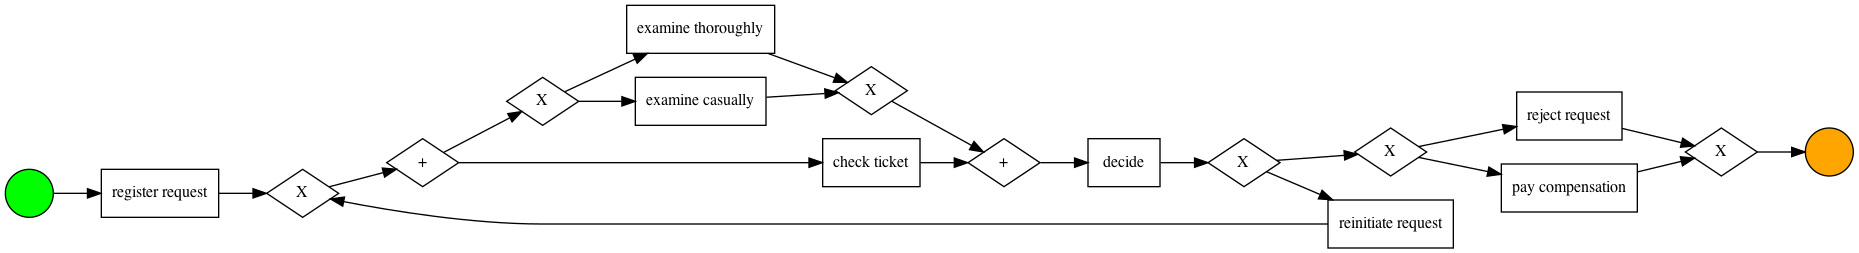

In [3]:
log = pm4py.read_xes('Dataset/running-example.xes')
process_model = pm4py.discover_bpmn_inductive(log)
pm4py.view_bpmn(process_model)

In [4]:
log

[{'attributes': {'concept:name': '3', 'creator': 'Fluxicon Nitro'}, 'events': [{'concept:name': 'register request', 'org:resource': 'Pete', 'time:timestamp': datetime.datetime(2010, 12, 30, 14, 32, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'Activity': 'register request', 'Resource': 'Pete', 'Costs': '50'}, '..', {'concept:name': 'pay compensation', 'org:resource': 'Ellen', 'time:timestamp': datetime.datetime(2011, 1, 15, 10, 45, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'Activity': 'pay compensation', 'Resource': 'Ellen', 'Costs': '200'}]}, '....', {'attributes': {'concept:name': '4', 'creator': 'Fluxicon Nitro'}, 'events': [{'concept:name': 'register request', 'org:resource': 'Pete', 'time:timestamp': datetime.datetime(2011, 1, 6, 15, 2, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'Activity': 'register request', 'Resource': 'Pete', 'Costs': '50'}, '..', {'concept:name': 'reject request', 'org:resource': 'Ellen', 'time:timestamp': 

In [1]:
import os
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.inductive import algorithm as inductive_miner

log = xes_importer.apply("Dataset/running-example.xes")
net, initial_marking, final_marking = inductive_miner.apply(log)

parsing log, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

In [3]:
log

[{'attributes': {'concept:name': '3', 'creator': 'Fluxicon Nitro'}, 'events': [{'concept:name': 'register request', 'org:resource': 'Pete', 'time:timestamp': datetime.datetime(2010, 12, 30, 14, 32, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'Activity': 'register request', 'Resource': 'Pete', 'Costs': '50'}, '..', {'concept:name': 'pay compensation', 'org:resource': 'Ellen', 'time:timestamp': datetime.datetime(2011, 1, 15, 10, 45, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'Activity': 'pay compensation', 'Resource': 'Ellen', 'Costs': '200'}]}, '....', {'attributes': {'concept:name': '4', 'creator': 'Fluxicon Nitro'}, 'events': [{'concept:name': 'register request', 'org:resource': 'Pete', 'time:timestamp': datetime.datetime(2011, 1, 6, 15, 2, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'Activity': 'register request', 'Resource': 'Pete', 'Costs': '50'}, '..', {'concept:name': 'reject request', 'org:resource': 'Ellen', 'time:timestamp': 

In [4]:
final_marking

['sink:1']

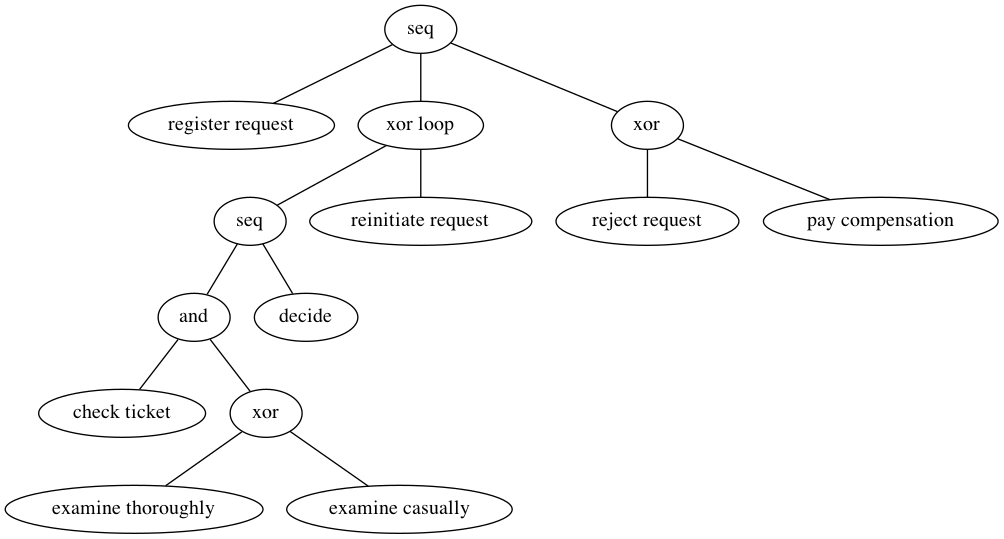

In [5]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.process_tree import visualizer as pt_visualizer

tree_model = inductive_miner.apply_tree(log)

gviz = pt_visualizer.apply(tree_model)
pt_visualizer.view(gviz)

In [9]:
tree_model.Variants.BASIC_PLAYOUT

AttributeError: 'ProcessTree' object has no attribute 'Variants'

In [21]:
tree_model

->( 'register request', *( ->( +( 'check ticket', X( 'examine thoroughly', 'examine casually' ) ), 'decide' ), 'reinitiate request' ), X( 'reject request', 'pay compensation' ) )

In [13]:
original_string = str(tree)
characters_to_remove = "->*+X"

new_string = original_string
for character in characters_to_remove:
    new_string = new_string.replace(character, "")

print(new_string)

( 'register request', ( ( ( 'check ticket', ( 'examine thoroughly', 'examine casually' ) ), 'decide' ), 'reinitiate request' ), ( 'reject request', 'pay compensation' ) )


In [26]:
from pm4py.visualization.decisiontree import visualizer as vis

In [25]:
test = inductive_miner.apply_tree(log)

In [27]:
vis.apply(test)

TypeError: apply() missing 2 required positional arguments: 'feature_names' and 'classes'

In [17]:
from sklearn import tree

In [42]:
tree_model

->( 'register request', *( ->( +( 'check ticket', X( 'examine thoroughly', 'examine casually' ) ), 'decide' ), 'reinitiate request' ), X( 'reject request', 'pay compensation' ) )

In [29]:
pm4py.read_ptml(tree_model)

TypeError: cannot parse from 'ProcessTree'

In [31]:
from pm4py import stats

In [49]:
from pm4py.objects.process_tree.utils import generic as gn

In [47]:
parse(str(tree_model))

->( 'register request', *( ->( +( 'check ticket', X( 'examine thoroughly', 'examine casually' ) ), 'decide' ), 'reinitiate request' ), X( 'reject request', 'pay compensation' ) )

In [45]:
str(tree_model)

"->( 'register request', *( ->( +( 'check ticket', X( 'examine thoroughly', 'examine casually' ) ), 'decide' ), 'reinitiate request' ), X( 'reject request', 'pay compensation' ) )"

In [52]:
gn.get_leaves(tree_model, leaves = 'check ticket')

AttributeError: 'str' object has no attribute 'add'

In [166]:
tree_model.children[2].children[0].operator

In [70]:
gn.get_leaves(tree_model)   ##process definition generator

{check ticket,
 decide,
 examine casually,
 examine thoroughly,
 pay compensation,
 register request,
 reinitiate request,
 reject request}

In [89]:
process_model_process_tree = pm4py.discover_process_tree_inductive(log)

In [94]:
pm = process_model_process_tree 

In [92]:
from pm4py.objects.process_tree.utils import generic as gn

In [95]:
gn.project_execution_sequence_to_leafs(pm)

TypeError: 'ProcessTree' object is not iterable

In [96]:
gn.is_leaf(pm.child)

False

In [98]:
pm.children

[register request,
 *( ->( +( 'check ticket', X( 'examine thoroughly', 'examine casually' ) ), 'decide' ), 'reinitiate request' ),
 X( 'reject request', 'pay compensation' )]

In [99]:
gn.reduce_tau_leafs(pm)

->( 'register request', *( ->( +( 'check ticket', X( 'examine thoroughly', 'examine casually' ) ), 'decide' ), 'reinitiate request' ), X( 'reject request', 'pay compensation' ) )

In [100]:
gn.fold(pm)

->( 'register request', *( ->( +( 'check ticket', X( 'examine thoroughly', 'examine casually' ) ), 'decide' ), 'reinitiate request' ), X( 'reject request', 'pay compensation' ) )

In [161]:
len(pm.children[1]._get_children())

2

In [163]:
pm.children[1].children[0].operator

->

In [147]:
len(pm._get_children())

3

In [13]:
from pm4py.statistics.variants.log import get as pml

In [50]:
test_pml = pml.get_variants_sorted_by_count(pml.get_variants(log))

In [51]:
from pm4py.statistics.variants.pandas import get as pmd

In [52]:
pmd.get_variants_count(log_pm)

{'process_A,process_B': 7, 'process_A,process_C': 3}

In [53]:
import pandas as pd
event_log = pd.read_csv('outputs/xor_log.csv')

In [54]:
event_log.columns = ['Index','entity', 'event_time', 'activity' ]

In [55]:
event_log = event_log.drop(['Index'],axis = 1)

In [56]:
log_pm = pm4py.format_dataframe(event_log, case_id = 'entity', activity_key = 'activity', 
                                timestamp_key = 'event_time')

In [57]:
variant_list = test_pml[0][0].split(',')

In [58]:
variant_list

['register request',
 'examine thoroughly',
 'check ticket',
 'decide',
 'reject request']

In [59]:
test_pml

[['register request,examine thoroughly,check ticket,decide,reject request', 1],
 ['register request,examine casually,check ticket,decide,reinitiate request,examine thoroughly,check ticket,decide,pay compensation',
  1],
 ['register request,examine casually,check ticket,decide,reinitiate request,check ticket,examine casually,decide,reinitiate request,examine casually,check ticket,decide,reject request',
  1],
 ['register request,examine casually,check ticket,decide,pay compensation', 1],
 ['register request,check ticket,examine thoroughly,decide,reject request', 1],
 ['register request,check ticket,examine casually,decide,pay compensation', 1]]